In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from datetime import date, datetime

from sklearn.metrics import confusion_matrix
from sklearn.metrics import normalized_mutual_info_score, mutual_info_score
from sklearn.feature_selection import mutual_info_regression

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LinearRegression

from sklearn.pipeline import Pipeline

from matplotlib import colors
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers

In [2]:
def display_learning_curves(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history["loss"])
    ax1.set_xlabel("Epochs")
    ax1.set_ylabel("Loss")

    ax2.plot(history.history["accuracy"])
    ax2.set_xlabel("Epochs")
    ax2.set_ylabel("Accuracy")
    plt.show()

In [3]:

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [4]:
import seaborn as sns
sns.set_style("whitegrid")

In [5]:
state = 'AL'

In [6]:
file_symptoms_train = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_train.fea'

noun_sentence_state_train = pd.read_feather(file_symptoms_train)

In [7]:
file_symptoms_test = 'comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_test.fea'
noun_sentence_state_test = pd.read_feather(file_symptoms_test)

In [8]:
noun_sentence_state_test_transdate_train = noun_sentence_state_train.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_train = noun_sentence_state_test_transdate_train.rename(columns={"avmerror": "avmerror_mean"})

In [9]:
noun_sentence_state_test_transdate_test = noun_sentence_state_test.groupby('Transdate').mean()[['avmerror']].reset_index()
noun_sentence_state_test_transdate_test = noun_sentence_state_test_transdate_test.rename(columns={"avmerror": "avmerror_mean"})

In [10]:
noun_sentence_state_train = noun_sentence_state_train.merge(noun_sentence_state_test_transdate_train,
                                                         how='left', left_on='Transdate', right_on='Transdate')

In [11]:
noun_sentence_state_test = noun_sentence_state_test.merge(noun_sentence_state_test_transdate_test,
                                                         how='left', left_on='Transdate', right_on='Transdate')

In [12]:
selcted_columns = ['cbsa', 'Transdate', 
       'cj_living_area', 'census_tract', 'zip', 
       'avmValue', 
       'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
       'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
       'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
       'AVM_Error_Indicators_6', 'AVM_Error_Indicators_7',
       'AVM_Error_Indicators_8', 'AVM_Error_Indicators_9',
       'AVM_Error_Indicators_10', 'AVM_Error_Indicators_11',
       'AVM_Error_Indicators_scale', 'AVM_Error_Indicators_scale_inverse',
       'Listing_Error_Indicators_0', 'Listing_Error_Indicators_1',
       'Listing_Error_Indicators_2', 'Listing_Error_Indicators_3',
       'Listing_Error_Indicators_4', 'Listing_Error_Indicators_5',
       'Listing_Error_Indicators_6', 'Listing_Error_Indicators_7',
       'Listing_Error_Indicators_8', 'Listing_Error_Indicators_9',
       'Listing_Error_Indicators_10', 'Listing_Error_Indicators_11',
       'AVM_Error_Indicators_0_max_value',
       'AVM_Error_Indicators_0_min_value',
       'AVM_Error_Indicators_0_max_indicator',
       'AVM_Error_Indicators_0_min_indicator',
       'AVM_Error_Indicators_0_diff_indicator',
       'AVM_Error_Indicators_0_diff_value', 'AVM_Error_Indicators_0_mean','avmerror_mean']

In [13]:
selcted_columns = selcted_columns + list(noun_sentence_state_train.columns[51:-1])

In [14]:
symptoms_df = noun_sentence_state_train.loc[:,selcted_columns]
symptoms_df_test = noun_sentence_state_test.loc[:,selcted_columns]

In [15]:
noun_sentence_state_train['category_predictand'] = 0
noun_sentence_state_train.loc[noun_sentence_state_train['avmerror']>=0.,'category_predictand'] = 1

In [16]:
noun_sentence_state_test['category_predictand'] = 0
noun_sentence_state_test.loc[noun_sentence_state_test['avmerror']>=0.,'category_predictand'] = 1

In [31]:
Predictors = symptoms_df.to_numpy()
X_test = symptoms_df_test.to_numpy()
X_train = Predictors
predictand = noun_sentence_state_train.category_predictand.values
y_train = predictand
y_test = noun_sentence_state_test.category_predictand.values

y_train_regressor = noun_sentence_state_train.avmerror.values

In [35]:
X_train = X_train.astype(float)
X_test = X_test.astype(float)

In [36]:
X_train

array([[1.9300000e+04, 2.0190220e+07, 1.6580000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.3860000e+04, 2.0090715e+07, 1.5180000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3820000e+04, 2.0200828e+07, 1.5580000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.3820000e+04, 2.0080228e+07, 2.8950000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3820000e+04, 2.0050128e+07, 2.3600000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.3820000e+04, 2.0130325e+07, 1.2980000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [37]:
transform_predictors = MinMaxScaler(feature_range=(-8, 8)).fit(X_train)
X_train_transform = transform_predictors.transform(X_train)
X_test_transform = transform_predictors.transform(X_test)

In [25]:
X_train.shape

(125682, 3047)

In [64]:
from tensorflow.keras import datasets, layers, models

In [81]:
# Model definition

model_NN_Class = keras.Sequential()
model_NN_Class.add(keras.layers.Dense(200, activation='gelu', input_dim=3047))
model_NN_Class.add(keras.layers.BatchNormalization(trainable=True))
model_NN_Class.add(keras.layers.Dropout(0.5))
model_NN_Class.add(keras.layers.Dense(50, activation='gelu'))
#model_NN_Class.add(keras.layers.Dense(100, activation='relu'))
model_NN_Class.add(keras.layers.BatchNormalization(trainable=True))
model_NN_Class.add(keras.layers.Dropout(0.5))
#model_NN_Class.add(keras.layers.Dense(3, activation='softmax'))
model_NN_Class.add(keras.layers.Dense(1, activation='linear'))

In [82]:

#model_NN_Class.compile(optimizer=keras.optimizers.Adam(0.01),
#              loss='sparse_categorical_crossentropy',
#              metrics=['accuracy'])


model_NN_Class.compile(optimizer=keras.optimizers.Adam(0.01),
              loss='mae')

In [83]:
y_train.shape

(125682,)

In [84]:
X_train.shape

(125682, 3047)

In [85]:
X_train_transform.shape

(125682, 3047)

In [86]:
y_train_regressor

array([-0.00018767, -0.14632777,  0.09569468, ...,  0.13422162,
       -0.05098854,  0.01627937])

In [87]:

history = model_NN_Class.fit(X_train_transform, y_train_regressor, epochs=10, batch_size=1000)


Epoch 1/10
126/126 [==============================] - 11s 40ms/step - loss: 0.1708
Epoch 2/10
126/126 [==============================] - 6s 50ms/step - loss: 0.0859
Epoch 3/10
126/126 [==============================] - 8s 60ms/step - loss: 0.0847
Epoch 4/10
126/126 [==============================] - 6s 49ms/step - loss: 0.0834
Epoch 5/10
126/126 [==============================] - 6s 50ms/step - loss: 0.0819
Epoch 6/10
126/126 [==============================] - 7s 52ms/step - loss: 0.0812
Epoch 7/10
126/126 [==============================] - 7s 53ms/step - loss: 0.0806
Epoch 8/10
126/126 [==============================] - 7s 54ms/step - loss: 0.0803
Epoch 9/10
126/126 [==============================] - 7s 53ms/step - loss: 0.0800
Epoch 10/10
126/126 [==============================] - 6s 45ms/step - loss: 0.0796


In [88]:
#display_learning_curves(history)

In [89]:
history.history

{'loss': [0.1708490401506424,
  0.08592169731855392,
  0.0847458466887474,
  0.08344858884811401,
  0.08190160989761353,
  0.08118918538093567,
  0.08058536797761917,
  0.08031091839075089,
  0.07997787743806839,
  0.07960405945777893]}

In [90]:
#predictions_test_prob = model_NN_Class.predict(X_test)
#predictions_train_prob = model_NN_Class.predict(X_train)

In [91]:
predictions_test_prob = model_NN_Class(X_test, training=True).numpy()
predictions_train_prob = model_NN_Class(X_train, training=True).numpy()

In [92]:
predictions_train_prob

array([[-0.03081957],
       [ 0.02849185],
       [ 0.05747443],
       ...,
       [ 0.01416192],
       [ 0.04490895],
       [-0.01752272]], dtype=float32)

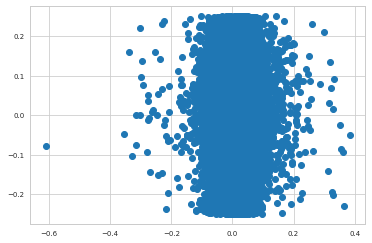

In [93]:
plt.plot(predictions_train_prob.reshape(len(predictions_train_prob)), y_train_regressor,'o')

In [46]:
predictions_test = np.argmax(predictions_test_prob,axis=1)
predictions_train = np.argmax(predictions_train_prob,axis=1)

In [ ]:
model_NN_Class.evaluate(X_train, y_train, verbose=2)

In [ ]:
model_NN_Class.evaluate(X_train, y_train, verbose=2)

In [ ]:
model_NN_Class.evaluate(X_test, y_test, verbose=2)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [ ]:
cm_train = confusion_matrix(y_train, predictions_train)
print(cm_train)

In [ ]:
accuracy_score(y_train, predictions_train)

In [ ]:
top_k_accuracy_score(y_train, predictions_train_prob, k=2)

In [ ]:
f1_score(y_train, predictions_train, average='macro')

In [ ]:
f1_score(y_train, predictions_train, average='micro')

In [ ]:
precision_score(y_train, predictions_train, average= 'macro')

In [ ]:
cm_test = confusion_matrix(y_test, predictions_test)
print(cm_test)

In [ ]:
accuracy_score(y_test, predictions_test)

In [ ]:
top_k_accuracy_score(y_test, predictions_test_prob, k=2)

In [ ]:
plt.plot(y_train[0:1000])
plt.plot(predictions_train[0:1000])


In [ ]:
predictions_train

In [ ]:
plt.hist2d(predictions_train,y_train,bins=3)

In [ ]:
df = symptoms_dataframe_ri.copy()


In [ ]:
predictions_test_value = df['avmValue'].values[train_samples:]/(1-predictions_test)
predictions_train_value = df['avmValue'].values[:train_samples]/(1-predictions_train)
#predictions_train_value = df['avmValue'].values/(1-Predictors)

In [ ]:
df.columns

In [ ]:
Series_disctzd

In [ ]:
print(np.mean(np.abs(df['Transprice'].values[:train_samples]-predictions_train_value)/\
              (df['Transprice'].values[:train_samples])))
print(np.mean(np.abs(df['Transprice'].values[:train_samples]- Series_disctzd[:train_samples])/\
              (df['Transprice'].values[:train_samples])))


In [ ]:
print(np.mean(np.abs(df['Transprice'].values[train_samples:]-predictions_test_value)/\
              (df['Transprice'].values[train_samples:])))
print(np.mean(np.abs(df['Transprice'].values[train_samples:]- Series_disctzd[train_samples:])/\
              (df['Transprice'].values[train_samples:])))


In [ ]:
plt.plot(predictions_train_value,df['Transprice'].values[:train_samples],'o')

In [ ]:
df.columns

In [ ]:
fig = plt.figure(figsize=(12,10))
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)
features = predictor_columns


In [ ]:
list(features[indices][-250:])

In [ ]:
[features[i] for i in indices]

In [ ]:
import joblib
filename = 'RF_newmodel_01_3mins.sav'
joblib.dump(model,filename)